In [ ]:
# Import the packages
# read the data
# divide into X and y
# divide into train test split

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# EDA
#  Missing values impuation
#  outlier analysis
#  Analaysis === extra features
#  Scaling
#  ecoding
#  feature slection
data=pd.read_csv(r'C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\preprocessd_data.csv')
X=data.drop('churn',axis=1)
y=data['churn']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

# Without Hyper parameter Tuning

- Keeping original parameter values same

- We are not touching the parameter values

- **Package name : sklearn**

- **Class name : tree**

- **Method name : DecisionTreeClassifier**

In [3]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

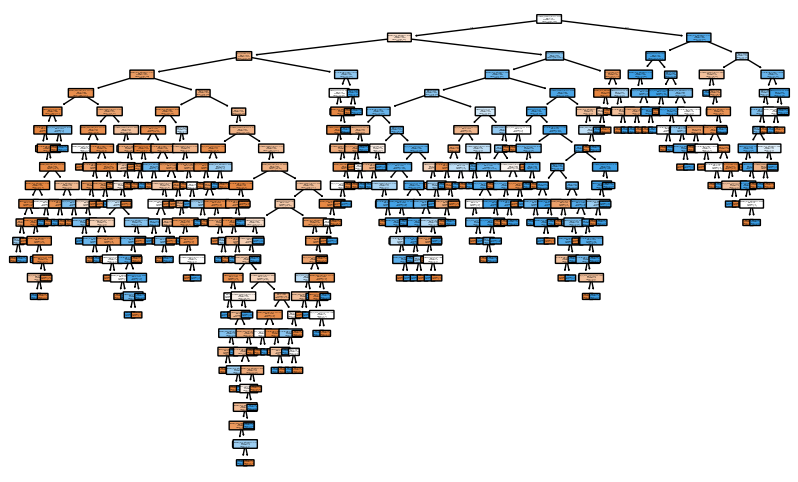

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plot_tree(dtree,
          feature_names=X_train.columns,
          class_names=['0','1'],
         filled=True,
         rounded=True)
plt.show()

**Model Prediction**

In [7]:
y_pred=dtree.predict(X_test)

In [9]:
X_test.shape,y_pred.shape,y_test.shape

((682, 10), (682,), (682,))

In [11]:
print(y_pred[:20]) # array
print(y_test.values[:20]) # series

[0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0]
[0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0]


In [13]:
# we will create a dataframe
# X_test y_actual(y_test) y_pred
eval_df=X_test
eval_df['y_actual']=y_test
eval_df['y_pred']=y_pred
eval_df
# Create one more column called as correct_prediction
# if y_actual==y_pred the correct_prediction=1 else 0

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,y_actual,y_pred
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473,0,0
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565,1,1
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501,1,1
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473,0,0
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473,0,0
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473,0,0
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468,0,0
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024,1,1


In [15]:
import numpy as np
con1=eval_df['y_actual']==eval_df['y_pred']
eval_df['Correct_prediction']=np.where(con1,1,0)
eval_df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,y_actual,y_pred,Correct_prediction
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473,0,0,1
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565,1,1,1
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501,1,1,1
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473,0,0,1
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473,0,0,1
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473,0,0,1
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468,0,0,1
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024,1,1,1


**Accuracy**

- Sum of all correct observations upon total observations

In [17]:
import numpy as np
# y_test.values==y_pred  True False
# counting how many True cases 
no_of_corrects=np.sum(y_test.values==y_pred)
accuracy=round(no_of_corrects/len(y_pred),2)
accuracy

0.87

**TP-TN-FP-FN**

- TP: y_actaul==1 and y_pred==1

- TN: y_actaul==0 and y_pred==0

- FP: y_actaul==0 and y_pred==1

- FN: y_actaul==1 and y_pred==0

In [19]:
import numpy as np
con=y_test.values==y_pred
np.sum(np.where(con,1,0))/len(y_pred)

0.8695014662756598

In [21]:
TP=np.sum((y_test.values==1)&(y_pred==1))
TN=np.sum((y_test.values==0)&(y_pred==0))
FP=np.sum((y_test.values==0)&(y_pred==1))
FN=np.sum((y_test.values==1)&(y_pred==0))

In [23]:
TP,FP,TN,FN

(285, 54, 308, 35)

**Precision-Recall-F1score**

In [25]:
pr=round(TP/(TP+FP),2)
rc=round(TP/(TP+FN),2)
f1=round(2*pr*rc/(pr+rc),2)
pr,rc,f1

(0.84, 0.89, 0.86)

$Using$ $Package$

In [27]:
from sklearn.metrics import confusion_matrix,precision_score,\
                            recall_score,f1_score,accuracy_score,\
                             roc_curve,auc,ConfusionMatrixDisplay

**Confusion Matrix**

In [29]:
dtree_cmt=confusion_matrix(y_test,y_pred)
# in python index start with 0
# 0 means No
# 1 means yes
# in the text book  yes no
# python will give no yes
dtree_cmt

array([[308,  54],
       [ 35, 285]], dtype=int64)

In [31]:
tn,fp,fn,tp=dtree_cmt.ravel()
print("True postives are:",tp)
print("True negatves are:",tn)
print("False postives are:",fp)
print("False negatives are:",fn)

True postives are: 285
True negatves are: 308
False postives are: 54
False negatives are: 35


**Draw the confusion Matrix**

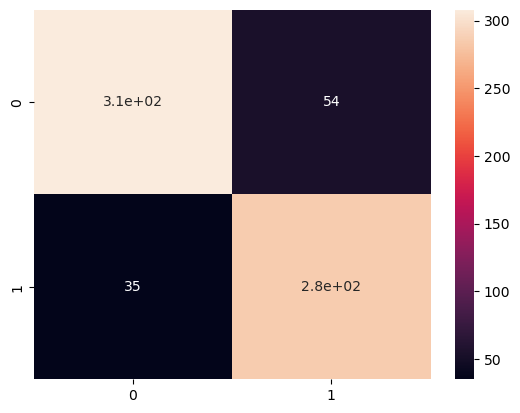

In [33]:
import seaborn as sns
sns.heatmap(dtree_cmt,annot=True)
plt.show()

**ConfusionMatrixDisplay**

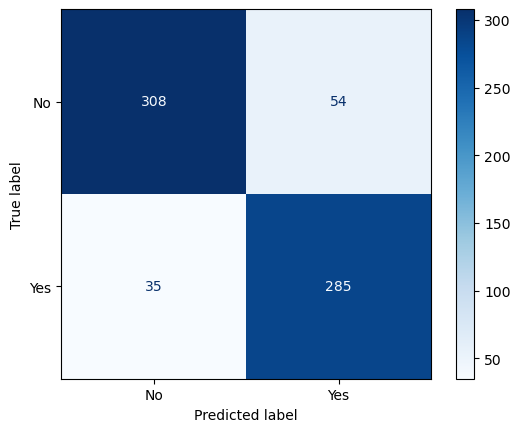

In [35]:
cmt=ConfusionMatrixDisplay(dtree_cmt,display_labels=['No','Yes'])
cmt.plot(cmap='Blues')
plt.show()

In [37]:
dtree_pr=round(precision_score(y_test,y_pred),2)
dtree_rc=round(recall_score(y_test,y_pred),2)
dtree_acc=round(accuracy_score(y_test,y_pred),2)
dtree_f1=round(f1_score(y_test,y_pred),2)
print("precision is:",dtree_pr)
print("recall is:",dtree_rc)
print("accuracy is:",dtree_acc)
print("f1 score is:",dtree_f1)

precision is: 0.84
recall is: 0.89
accuracy is: 0.87
f1 score is: 0.86


**Roc-Curve**

- Roc curve is a graph between (1-specificity) vs sensitivity

- FPR vs TPR

- Precision score , recall score , f1 score , accuracy score

     - takes y_true vs y_pred


- But Roc curve takes y_true vs y_score

     - y_score means probabilities


- For every observation model will give two probabilities

- Here we have two labels No and Yes

- So we will get two probabilites by using a method: **predict_proba**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
data=pd.read_csv(r'C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\preprocessd_data.csv')
X=data.drop('churn',axis=1)
y=data['churn']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

In [41]:
y_predict_prob=dtree.predict_proba(X_test)

#ob   No  Yes
# 1   1   0    100% chanec the output become No : 0
#2    0   1    100% chanec the output become yes : 1

# [No,Yes,Yes,No,No]  =[0,1,1,0,0]
#dtree.predict(X_test)
y_predict_prob_yes=y_predict_prob[:,1] #all the rows from one column

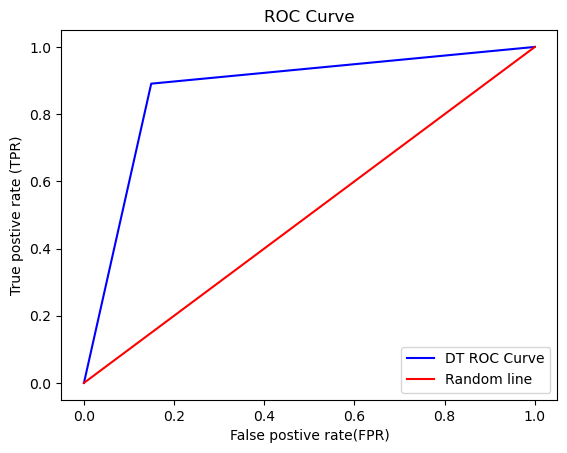

In [43]:
import matplotlib.pyplot as plt
fpr,tpr,threholds=roc_curve(y_test,y_predict_prob_yes)
plt.plot(fpr,tpr,color='blue',label="DT ROC Curve")
plt.plot([0,1],[0,1],color='red',label="Random line")
plt.xlabel('False postive rate(FPR)')
plt.ylabel('True postive rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()